In [1]:
import nltk
import re
import string
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from math import radians, sin, cos, sqrt, atan2
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error, r2_score


# from evalml.objectives import get_optimization_objectives
# from evalml.problem_types import ProblemTypes

from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
import os


In [2]:
directory_path = r"Downloads/drive-download-20231127T023713Z-001"
df_array = []
rowtotal_before_eda = []

for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory_path, filename)

        # Read the CSV file into a DataFrame and append to the list
        
        df = pd.read_csv(file_path)
        df_array.append(df)
        rowtotal_before_eda.append(df.shape[0])
        

# Concatenate all DataFrames in the list
final_df = pd.concat(df_array, axis=0, ignore_index=True)
print("Before drop: ", sum(rowtotal_before_eda))


Before drop:  548999


In [3]:
directory_path = r"Downloads/drive-download-20231127T023713Z-001"

# List to store DataFrames
df_array = []
rowtotal_before_eda = []
rowtotal_after_eda = []
# Iterate through all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory_path, filename)

        # Read the CSV file into a DataFrame and append to the list
        df = pd.read_csv(file_path)
        df = df.drop(columns=["End_Lat", "End_Lng"], axis=1)
        rowtotal_before_eda.append(df.shape[0])
        df = df.dropna()
        df_array.append(df)
        rowtotal_after_eda.append(df.shape[0])
print("Before drop: ", sum(rowtotal_before_eda))
print("After drop: ", sum(rowtotal_after_eda))

Before drop:  548999
After drop:  496380


In [4]:
df_array[0].columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'month'],
      dtype='object')

In [5]:
len(df_array)

21

In [6]:
final_df = pd.concat(df_array, axis=0, ignore_index=True)

In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496380 entries, 0 to 496379
Data columns (total 42 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 496380 non-null  object 
 1   Source             496380 non-null  object 
 2   Severity           496380 non-null  int64  
 3   Start_Time         496380 non-null  object 
 4   End_Time           496380 non-null  object 
 5   Start_Lat          496380 non-null  float64
 6   Start_Lng          496380 non-null  float64
 7   Distance(mi)       496380 non-null  float64
 8   Description        496380 non-null  object 
 9   Street             496380 non-null  object 
 10  City               496380 non-null  object 
 11  County             496380 non-null  object 
 12  State              496380 non-null  object 
 13  Zipcode            496380 non-null  object 
 14  Country            496380 non-null  object 
 15  Timezone           496380 non-null  object 
 16  Ai

In [8]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,496380.0,2.241231,0.486580,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,496380.0,34.765113,5.015482,25.808481,32.746559,33.944302,39.711170,47.412060
Start_Lng,496380.0,-92.746474,12.971413,-123.404631,-96.914310,-85.678400,-82.260422,-70.592566
Distance(mi),496380.0,0.388937,1.230507,0.000000,0.000000,0.010000,0.328000,254.399994
Temperature(F),496380.0,63.728431,19.223672,-89.000000,51.000000,66.200000,78.100000,116.600000
Wind_Chill(F),496380.0,61.664192,21.388310,-89.000000,48.962162,66.000000,78.000000,115.000000
Humidity(%),496380.0,63.412297,22.683365,2.000000,46.000000,65.000000,83.000000,100.000000
Pressure(in),496380.0,29.408986,1.179072,16.820000,29.250000,29.720000,30.010000,31.140000
Visibility(mi),496380.0,9.496003,4.065445,0.000000,10.000000,10.000000,10.000000,111.000000
Wind_Speed(mph),496380.0,8.407284,5.207016,0.000000,5.000000,8.000000,12.000000,255.000000


In [9]:
final_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,month
0,A-261024,Source2,3,2016-11-30 16:54:09,2016-11-30 17:53:43,32.824287,-97.312775,0.01,#2 lane blocked due to accident on I-35W North...,Meacham Blvd,...,False,False,False,False,False,False,True,False,Day,11.0
1,A-261091,Source2,3,2016-11-30 19:13:07,2016-11-30 19:42:39,32.826641,-97.385025,0.01,#1 lane blocked queueing traffic and left hand...,Loop 820 E,...,False,False,False,False,False,False,False,False,Night,11.0
2,A-261092,Source2,3,2016-11-30 19:11:14,2016-11-30 19:40:50,32.746559,-97.319366,0.01,Queueing traffic #4 lane blocked and right han...,I-35W N,...,False,False,False,False,False,False,False,False,Night,11.0
3,A-261110,Source2,3,2016-11-30 19:48:00,2016-11-30 20:17:43,32.666855,-97.320724,0.01,Right hand shoulder blocked due to accident on...,I-35W S,...,False,False,False,False,False,False,False,False,Night,11.0
4,A-261155,Source2,3,2016-11-30 22:09:59,2016-11-30 22:39:24,32.668968,-97.238792,0.01,#1 lane blocked and queueing traffic due to ac...,I-820 N,...,False,False,False,False,False,False,False,False,Night,11.0


In [10]:
final_df["City"].unique()

array(['Fort Worth', 'Dayton', 'Henrico', 'Columbia', 'Fremont', 'Fresno',
       'Hollywood', 'Fort Lauderdale', 'Detroit', 'Grand Rapids',
       'Glendale', 'Flint', 'Hialeah', 'Columbus', 'El Paso', 'Dallas',
       'Fort Myers', 'Corona', 'Greenville', 'Hayward', 'Denver'],
      dtype=object)

In [11]:
accidents_by_city_count = final_df.groupby("City").size()

In [12]:
accidents_by_city_count

City
Columbia            33825
Columbus            19983
Corona              18993
Dallas             123290
Dayton              19903
Denver              28790
Detroit             24272
El Paso             10826
Flint               16293
Fort Lauderdale     25634
Fort Myers          17547
Fort Worth          17244
Fremont              5436
Fresno              16729
Glendale            10079
Grand Rapids        20997
Greenville          34167
Hayward             12360
Henrico              9388
Hialeah             20537
Hollywood           10087
dtype: int64

In [13]:
accidents_by_city_count_sorted = accidents_by_city_count.sort_values(ascending=False)
top_20_accidents = accidents_by_city_count_sorted[0:20]
print(top_20_accidents)

City
Dallas             123290
Greenville          34167
Columbia            33825
Denver              28790
Fort Lauderdale     25634
Detroit             24272
Grand Rapids        20997
Hialeah             20537
Columbus            19983
Dayton              19903
Corona              18993
Fort Myers          17547
Fort Worth          17244
Fresno              16729
Flint               16293
Hayward             12360
El Paso             10826
Hollywood           10087
Glendale            10079
Henrico              9388
dtype: int64


<Axes: ylabel='City'>

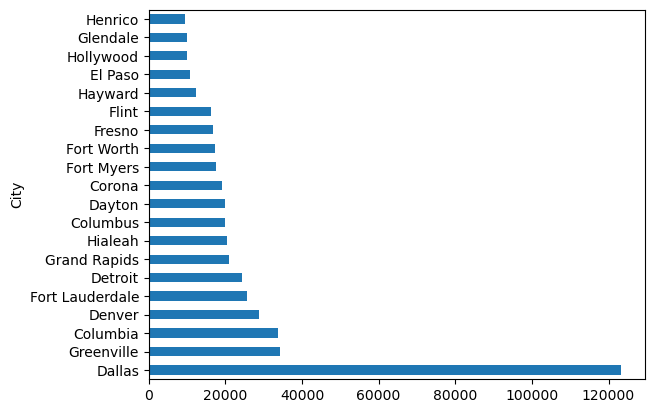

In [14]:
top_20_accidents.plot(kind = "barh")

In [15]:
df_withyear = final_df.copy()
formats = ['%Y-%m-%d %H:%M:%S', '%Y-%m-%d %H:%M:%S.%f']
df_withyear['Start_Time'] = pd.to_datetime(df_withyear['Start_Time'], format="mixed", errors = 'coerce' )
df_withyear['Year'] = df_withyear['Start_Time'].dt.year

/Users/francispagulayan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


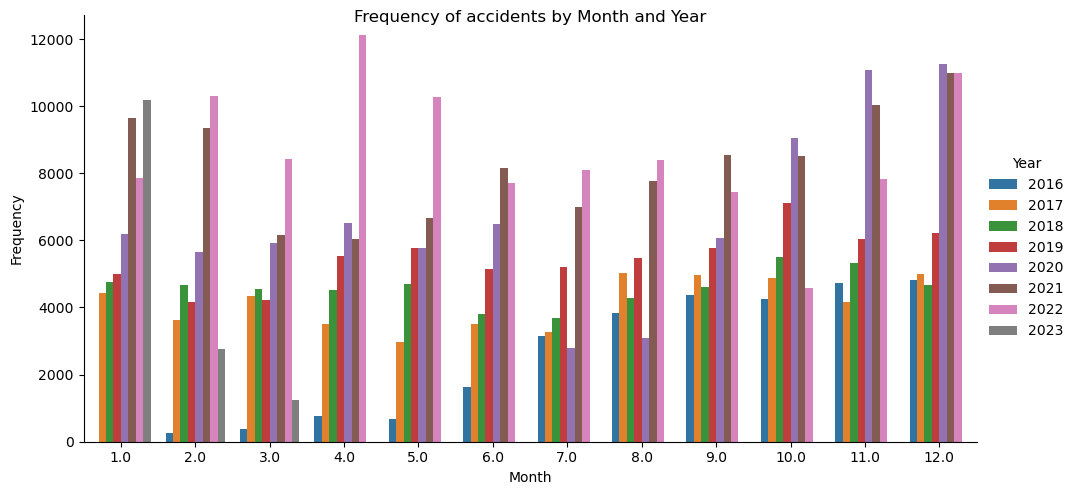

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


df_withyear['Year'] = pd.Categorical(df_withyear['Year'])
# Create a catplot
sns.catplot(x='month', kind='count', hue='Year', data=df_withyear, aspect =2)

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.suptitle('Frequency of accidents by Month and Year')

# Show the plot
plt.show()

In [17]:
df_withyear.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'month', 'Year'],
      dtype='object')

In [18]:
final_df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'month'],
      dtype='object')

In [19]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Assuming 'final_df' is your DataFrame and 'Severity' is the target variable
sampled_df = final_df.sample(frac=0.1, random_state=42)
sampled_df.dropna(inplace=True)

categorical_cols = sampled_df.select_dtypes(include=['object', 'bool', 'category']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    sampled_df[col] = label_encoder.fit_transform(sampled_df[col])

# Convert the target variable 'Severity' to start from 0
label_encoder_y = LabelEncoder()
sampled_df['Severity'] = label_encoder_y.fit_transform(sampled_df['Severity'])

X = sampled_df.drop('Severity', axis=1)
y = sampled_df['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=100000),
    "Gradient Boosting": GradientBoostingClassifier(),
    "MLP": MLPClassifier(max_iter=1000),
}

# Train and evaluate each model
for name, model in models.items():
    # Use scaled data for models
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(cm)
    print("\n")
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"{name} Cross-Validation Scores: {np.mean(cv_scores):.2f} (mean) +/- {np.std(cv_scores):.2f} (std)\n")

Random Forest Metrics:
Accuracy: 91.79%
Precision: 0.92
Recall: 0.92
F1 Score: 0.92
Confusion Matrix:
[[  164    36     6     0]
 [   34 10634   428     5]
 [    0   594  2768     1]
 [    0    96    22   104]]


Random Forest Cross-Validation Scores: 0.91 (mean) +/- 0.00 (std)

Decision Tree Metrics:
Accuracy: 89.75%
Precision: 0.90
Recall: 0.90
F1 Score: 0.90
Confusion Matrix:
[[  158    40     5     3]
 [   49 10322   660    70]
 [    6   598  2741    18]
 [    0    58    19   145]]


Decision Tree Cross-Validation Scores: 0.89 (mean) +/- 0.00 (std)



/Users/francispagulayan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Metrics:
Accuracy: 84.65%
Precision: 0.83
Recall: 0.85
F1 Score: 0.84
Confusion Matrix:
[[   74   122    10     0]
 [   14 10360   727     0]
 [    2  1189  2172     0]
 [    0   203    19     0]]


SVM Cross-Validation Scores: 0.84 (mean) +/- 0.00 (std)



/Users/francispagulayan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Metrics:
Accuracy: 80.27%
Precision: 0.78
Recall: 0.80
F1 Score: 0.78
Confusion Matrix:
[[   19   180     7     0]
 [   19 10244   838     0]
 [    3  1669  1691     0]
 [    0   216     6     0]]


Logistic Regression Cross-Validation Scores: 0.80 (mean) +/- 0.00 (std)

Gradient Boosting Metrics:
Accuracy: 91.85%
Precision: 0.92
Recall: 0.92
F1 Score: 0.92
Confusion Matrix:
[[  171    30     4     1]
 [   24 10622   452     3]
 [    3   597  2763     0]
 [    0    84    16   122]]


Gradient Boosting Cross-Validation Scores: 0.92 (mean) +/- 0.00 (std)

MLP Metrics:
Accuracy: 85.95%
Precision: 0.86
Recall: 0.86
F1 Score: 0.86
Confusion Matrix:
[[  141    58     7     0]
 [   53 10167   842    39]
 [   14   876  2449    24]
 [    1   135    43    43]]


MLP Cross-Validation Scores: 0.85 (mean) +/- 0.00 (std)



## HyperParameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters and model
best_params_rf = grid_search_rf.best_params_
best_rf = grid_search_rf.best_estimator_


In [ ]:
param_grid_dt = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, n_jobs=-1)
grid_search_dt.fit(X_train_scaled, y_train)

best_params_dt = grid_search_dt.best_params_
best_dt = grid_search_dt.best_estimator_


In [ ]:
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_search_lr = GridSearchCV(LogisticRegression(max_iter=100000), param_grid_lr, cv=5, n_jobs=-1)
grid_search_lr.fit(X_train_scaled, y_train)

best_params_lr = grid_search_lr.best_params_
best_lr = grid_search_lr.best_estimator_


In [ ]:
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5, n_jobs=-1)
grid_search_gb.fit(X_train_scaled, y_train)

best_params_gb = grid_search_gb.best_params_
best_gb = grid_search_gb.best_estimator_


In [ ]:
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam']
}

grid_search_mlp = GridSearchCV(MLPClassifier(max_iter=1000), param_grid_mlp, cv=5, n_jobs=-1)
grid_search_mlp.fit(X_train_scaled, y_train)

best_params_mlp = grid_search_mlp.best_params_
best_mlp = grid_search_mlp.best_estimator_


In [ ]:
# List of tuned models
tuned_models = [best_rf, best_dt, best_lr, best_gb, best_mlp]

# Model names
model_names = ["Optimized Random Forest", "Optimized Decision Tree", 
                "Optimized Logistic Regression", 
               "Optimized Gradient Boosting", "Optimized MLP"]

# Evaluate each tuned model
for name, model in zip(model_names, tuned_models):
    y_pred = model.predict(X_test_scaled)

    # Classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Displaying metrics
    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(cm)
    print("\n")


In [ ]:
baseline_metrics = {
    'Random Forest': {'Accuracy': 0.91898, 'Precision': 0.91, 'Recall': 0.90, 'F1': 0.90},
    'Decision Tree': {'Accuracy': 0.85, 'Precision': 0.86, 'Recall': 0.85, 'F1': 0.85},
    'Logistic Regression': {'Accuracy': 0.90, 'Precision': 0.91, 'Recall': 0.90, 'F1': 0.90},
    'Gradient Boosting': {'Accuracy': 0.85, 'Precision': 0.86, 'Recall': 0.85, 'F1': 0.85},
    'MLP': {'Accuracy': 0.90, 'Precision': 0.91, 'Recall': 0.90, 'F1': 0.90},

}

tuned_metrics = {
    'Random Forest': {'Accuracy': 0.92, 'Precision': 0.93, 'Recall': 0.92, 'F1': 0.92},
    'Decision Tree': {'Accuracy': 0.88, 'Precision': 0.89, 'Recall': 0.88, 'F1': 0.88},
    'Logistic Regression': {'Accuracy': 0.90, 'Precision': 0.91, 'Recall': 0.90, 'F1': 0.90},
    'Gradient Boosting': {'Accuracy': 0.85, 'Precision': 0.86, 'Recall': 0.85, 'F1': 0.85},
    'MLP': {'Accuracy': 0.90, 'Precision': 0.91, 'Recall': 0.90, 'F1': 0.90},
}
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
n_groups = len(baseline_metrics)

# Create bar graphs for each metric
for metric in metrics:
    fig, ax = plt.subplots()

    index = np.arange(n_groups)
    bar_width = 0.35

    baseline_values = [baseline_metrics[model][metric] for model in baseline_metrics]
    tuned_values = [tuned_metrics[model][metric] for model in tuned_metrics]

    bar1 = plt.bar(index, baseline_values, bar_width, label='Baseline')
    bar2 = plt.bar(index + bar_width, tuned_values, bar_width, label='Tuned')

    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.title(f'Comparison of {metric} Before and After Tuning')
    plt.xticks(index + bar_width / 2, baseline_metrics.keys())
    plt.legend()

    plt.tight_layout()
    plt.show()
